# Del Mar College Glycol Pilot Plant Dataset Quick Start

Version 1.0 

The Pilot Plant Dataset is an Academic Hub dataset hosted by the OSIsoft Cloud Service (OCS, https://www.osisoft.com/solutions/cloud/vision/), a cloud-native real-time data infrastructure used to perform enterprise-wide analytics using tools and languages of the user's choice. 

<div class="alert alert-info">
<b>For documentation about the Pilot Plant dataset itself, please go to <a href="https://data.academic.osisoft.com/nbviewer/github/academic-hub/datasets/blob/master/Pilot_Plant_Dataset_Doc.ipynb">https://data.academic.osisoft.com/nbviewer/github/academic-hub/datasets/blob/master/Pilot_Plant_Dataset_Doc.ipynb</a></b>
</div>

**Raw operational data has specific characteristics making it difficult to deal with directly**, among them:

* variable data collection frequencies
* bad values (system error codes)
* data gaps 


**But data science projects using operational data needs to be:**

* **Time-aligned** to deal with the characteritics above in consistent way according to the data type (e.g. interpolation for float values, repeat last good value for categorical data, etc)
* **Context aware** so that the data can be understandable, across as many real-world assets that you need it for
* **Shaped and filtered** to ensure you have the data you need, in the form you need it

**The OCS solutions for application-ready data are Data Views:**

![](https://academichub.blob.core.windows.net/images/piworld-dse-dataview-p2.png)

**Each Academic Hub datasets comes endowed with a set of asset-centric data views.** 

The goal of Academic Hub Python library is to provide a very generic and consistent way to access:

* the list of existing datasets
* for a given dataset:
  * the list of its assets
  * the OCS namespace where the dataset is hosted
* for a given asset, the list of data views it belongs to

<div class="alert alert-info">
<b>The rest of this notebook is a working example of the functionality listed above for the Pilot Plant dataset</b>
</div>


## Install Academic Hub Python library 

In [1]:
!pip install ocs-academic-hub==0.97.0 plotly

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


## [Optional] Use the `pip uninstall` only in case of library issues

In [2]:
# It's sometimes necessary to uninstall previous versions, uncomment and run the following line. 
# Then restart kernel and reinstall with previous cell
# !pip uninstall -y ocs-academic-hub ocs-sample-library-preview

## Import HubClient, necessary to connect and interact with OCS

In [3]:
from ocs_academic_hub import HubClient
import datetime as dt

## Running the following cell initiates the login sequence

**Warning:** a new brower tab will open offering the choice of identifying with Microsoft or Google. You should always pick Google:
<img src="https://academichub.blob.core.windows.net/images/ocs-login-page-google.png" alt="Login screen" width="600"/>

Return to this web page when done

In [4]:
#%env OCS_HUB_CONFIG=config.ini
hub = HubClient()

env: OCS_HUB_CONFIG=config.ini
> configuration file: None
@ --- authorization granted ---
@ Hub data file: hub_datasets.json


## Refresh datasets information

Over time existing datasets are updated and new ones are added. The cell below makes sure you have the latest version of the production datasets. 

Note: after execution of this method, a file named `hub_datasets.json` will be created in the same directory as this notebook. The data in this file supersedes the one built-in with the `ocs_academic_hub` module. To get back to the built-in datasets information, move/rename/delete `hub_datasets.json`. 

In [5]:
hub.refresh_datasets()

@ Hub data file: hub_datasets.json
@ Current dataset: Brewery


## Get list of published hub datasets


In [6]:
hub.datasets()

['Brewery', 'Campus_Energy', 'Champlain_College', 'Pilot_Plant', 'Wind_Farms']

## Display current active dataset

The default dataset is Brewery. Only one dataset can be active. 

In [7]:
hub.current_dataset()

'Brewery'

## Set Pilot_Plant as the current dataset

In [8]:
hub.set_dataset("Pilot_Plant")

## Verify that Pilot Plant is active

In [9]:
hub.current_dataset()

'Pilot_Plant'

## Get list of assets with Data Views

Returned into the form of a pandas dataframe, with column `Asset_Id` and `Description`. Each asset has a unique `Asset_Id` as its identity. 

This data set has only two assets: Hands-On Training unit #1 (HOT-1) and Hands-On Training unit #3 (HOT-3). 

In [10]:
hots = hub.assets()
hots

Asset_Id Description
0    HOT-1  HOT-1 unit
1    HOT-3  HOT-3 unit

## List of all Data Views

Those are all single-asset default (with all data available for the asset) Data Views

In [11]:
hub.asset_dataviews()

['pilot.plant_hot-1', 'pilot.plant_hot-3']

## List of all Data Views for HOT-1 

Empty filter (`filter=""`) allows to see all dataviews for the asset instead of simply the default one. 

<div class="alert alert-warning">
<b>Assets HOT-1 and HOT-3 are built from a set of components, each component having its own data view. <a href="https://data.academic.osisoft.com/nbviewer/github/academic-hub/datasets/blob/master/Pilot_Plant_Dataset_Doc.ipynb#Hands-On-Training-Unit-#1-(HOT-1)">Click here</a> for the list of components and their description. </b>
</div>

We use `HOT-1` as the representative asset below: 

In [12]:
hot1_id = hots["Asset_Id"][0]
print("Asset Id:", hot1_id)
dvs_academic = hub.asset_dataviews(asset=hot1_id, filter="")
dvs_academic

Asset Id: HOT-1


['pilot.plant_hot-1',
 'pilot.plant_hot-1_e-101',
 'pilot.plant_hot-1_e-102',
 'pilot.plant_hot-1_htr-101',
 'pilot.plant_hot-1_tk-101',
 'pilot.plant_hot-1_tk-102',
 'pilot.plant_hot-1_tk-103']

## Get the OCS namespace associated to the dataset

Each data set belongs to a namespace within the Academic Hub OCS account. Since dataset may move over time, the function below always return the active namespace for the given dataset. 

In [13]:
dataset = hub.current_dataset()
namespace_id = hub.namespace_of(dataset)
namespace_id

'hub_lab_data'

## Get Data View structure

With Stream Name, the column name under which stream data appears, its value type and engineering units if available. The structure of the default data view is displayed below. 

In [14]:
dataview_id = hub.asset_dataviews(asset=hot1_id, filter="default")[0]
print("Data View ID:", dataview_id)
print(hub.dataview_definition(namespace_id, dataview_id).to_string(index=False))

Data View ID: pilot.plant_hot-1
Asset_Id                                             Column_Name Stream_Type Stream_UOM                   OCS_Stream_Name
   HOT-1                        E-101 Air Cooler Outlet Pressure       Float       PSIG     delmar.DELMAR_UNIT1_PI-113.PV
   HOT-1                     E-101 Air Cooler Outlet Temperature       Float         °F     delmar.DELMAR_UNIT1_TI-107.PV
   HOT-1                                    E-101 Inlet Pressure       Float       PSIG     delmar.DELMAR_UNIT1_PI-110.PV
   HOT-1                                        E-101 Run Status    Category                   delmar.DELMAR_UNIT1_XB-101
   HOT-1                     E-101 Shell Side Outlet Temperature       Float         °F     delmar.DELMAR_UNIT1_TI-106.PV
   HOT-1                                              E-102 Duty       Float               delmar.DELMAR_UNIT1_E-102_DUTY
   HOT-1                         E-102 Heat Transfer Coefficient       Float                delmar.DELMAR_UNIT1_E-

## Getting data from a Data View

Return interpolated data between a start and end date, with the requested interpolation interval (format is HH:MM:SS)


<div class="alert alert-warning">
<b>Since this training equipment is idle most of time, we show how to identify the interesting time ranges by filtering on the state transition `Not Running/Running` of the 5 `Run Status` streams/columns present in the Data View definition above for asset `HOT-1` 
</div>

In [15]:
# Obtain a Pandas dataframe with data spanning the whole current time range of the dataset,
# at 15 minutes interpolated interval since the beginning of the dataset up to now.

now = dt.datetime.now().isoformat()
print("Now:", now)

df_acad = hub.dataview_interpolated_pd(
    namespace_id, dataview_id, "2020-10-13T03:50", now, "00:15:00"
)
# Save a copy of the data frame as a CSV file for analysis/inspection with other tools (e.g. Excel)
df_acad.to_csv("pilot_plant.csv")
# Display preview result data frame
df_acad

Now: 2021-07-20T17:43:29.171312
+++++++++++++
  ==> Finished 'dataview_interpolated_pd' in       7.0587 secs [ 3.82K rows/sec ]


Timestamp Asset_Id  \
0     2020-10-13 03:50:00    HOT-1   
1     2020-10-13 04:05:00    HOT-1   
2     2020-10-13 04:20:00    HOT-1   
3     2020-10-13 04:35:00    HOT-1   
4     2020-10-13 04:50:00    HOT-1   
...                   ...      ...   
26931 2021-07-20 16:35:00    HOT-1   
26932 2021-07-20 16:50:00    HOT-1   
26933 2021-07-20 17:05:00    HOT-1   
26934 2021-07-20 17:20:00    HOT-1   
26935 2021-07-20 17:35:00    HOT-1   

       H-101 Outlet Temperature Controller Output  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
26931                                         NaN   
26932                                         NaN   
26933                                         NaN   
26934                                         NaN   
26935                                         NaN   

       E-102 Tube Side Inlet Temperature  \
0                              80.853500   
1                              80.568184   
2                              80.338120   
3                              80.108055   
4                              79.877990   
...                                  ...   
26931                          86.835106   
26932                          87.713356   
26933                          88.690380   
26934                                NaN   
26935                                NaN   

       E-102 Tube Side Outlet Temperature Controller PV  \
0                                             79.547200   
1                                             79.326280   
2                                             79.105354   
3                                             78.884440   
4                                             78.684654   
...                                                 ...   
26931                                         88.544970   
26932                                         89.663925   
26933                                         90.702354   
26934                                               NaN   
26935                                               NaN   

       Feed Flow Controller Setpoint  H-101 Outlet Pressure  \
0                                NaN               0.028985   
1                                0.0               0.028834   
2                                0.0               0.028684   
3                                0.0               0.028533   
4                                0.0               0.028382   
...                              ...                    ...   
26931                            NaN                    NaN   
26932                            NaN                    NaN   
26933                            NaN                    NaN   
26934                            NaN                    NaN   
26935                            NaN                    NaN   

       H-101 Outlet Temperature Controller Setpoint  \
0                                          0.000000   
1                                          0.000000   
2                                          0.000000   
3                                          0.000000   
4                                          0.000000   
...                                             ...   
26931                                     84.928986   
26932                                     85.534720   
26933                                     86.182040   
26934                                           NaN   
26935                                           NaN   

       E-101 Air Cooler Outlet Pressure  Feed Tank Level Controller Output  \
0                              0.024224                                NaN   
1                              0.023924                                0.0   
2                              0

In [16]:
# Information about the dataframe - this is a Pandas operation 
df_acad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26936 entries, 0 to 26935
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Timestamp                                               26936 non-null  datetime64[ns]
 1   Asset_Id                                                26936 non-null  object        
 2   H-101 Outlet Temperature Controller Output              20188 non-null  float64       
 3   E-102 Tube Side Inlet Temperature                       20207 non-null  float64       
 4   E-102 Tube Side Outlet Temperature Controller PV        20207 non-null  float64       
 5   Feed Flow Controller Setpoint                           20187 non-null  float64       
 6   H-101 Outlet Pressure                                   20198 non-null  float64       
 7   H-101 Outlet Temperature Controller Setpoint            20

### Find all Run Status columns

First, let display all the columns of the dataframe

In [17]:
df_acad.columns 

Index(['Timestamp', 'Asset_Id', 'H-101 Outlet Temperature Controller Output',
       'E-102 Tube Side Inlet Temperature',
       'E-102 Tube Side Outlet Temperature Controller PV',
       'Feed Flow Controller Setpoint', 'H-101 Outlet Pressure',
       'H-101 Outlet Temperature Controller Setpoint',
       'E-101 Air Cooler Outlet Pressure', 'Feed Tank Level Controller Output',
       'H-101 Outlet Temperature Controller PV', 'P-102 Discharge pressure',
       'E-102 Tube Side Outlet Pressure',
       'E-102 Tube Side Outlet Temperature Controller Output',
       'E-102 Tube Side Outlet Temperature Controller Setpoint',
       'E-102 Heat Transfer Coefficient', 'P-101 A/B Discharge pressure',
       'E-102 Inlet pressure', 'Feed Tank Level Controller PV',
       'Feed Flow Controller PV', 'E-102 Duty', 'Product Water Flow',
       'E-102 LMTD', 'Feed Tank Level Controller Setpoint',
       'E-101 Inlet Pressure', 'E-101 Air Cooler Outlet Temperature',
       'E-101 Shell Side Outlet Te

In [18]:
# Keep the ones with `Run Status` in them 
run_status_columns = [c for c in df_acad.columns if 'Run Status' in c]
run_status_columns

['P-103 Run Status',
 'P-102 Run Status',
 'P-101A Run Status',
 'P-101B Run Status',
 'E-101 Run Status']

In [19]:
# Build a subset dataframe with only Timestamp and the Run Status columns
run_df = df_acad[["Timestamp"] + run_status_columns]
# Save a CSV copy
run_df.to_csv("pilot_plant_run.csv")
run_df

Timestamp P-103 Run Status P-102 Run Status P-101A Run Status  \
0     2020-10-13 03:50:00      Not Running      Not Running       Not Running   
1     2020-10-13 04:05:00      Not Running      Not Running       Not Running   
2     2020-10-13 04:20:00      Not Running      Not Running       Not Running   
3     2020-10-13 04:35:00      Not Running      Not Running       Not Running   
4     2020-10-13 04:50:00      Not Running      Not Running       Not Running   
...                   ...              ...              ...               ...   
26931 2021-07-20 16:35:00      Not Running      Not Running       Not Running   
26932 2021-07-20 16:50:00      Not Running      Not Running       Not Running   
26933 2021-07-20 17:05:00      Not Running      Not Running       Not Running   
26934 2021-07-20 17:20:00      Not Running      Not Running       Not Running   
26935 2021-07-20 17:35:00      Not Running      Not Running       Not Running   

      P-101B Run Status E-101 Run Status  
0           Not Running      Not Running  
1           Not Running      Not Running  
2           Not Running      Not Running  
3           Not Running      Not Running  
4           Not Running      Not Running  
...                 ...              ...  
26931       Not Running      Not Running  
26932       Not Running      Not Running  
26933       Not Running      Not Running  
26934       Not Running      Not Running  
26935       Not Running      Not Running  

[26936 rows x 6 columns]

## Define a table plotting function to identify running state periods

Running states and the associated timestamps are highlighted in green

In [20]:
# Some required imports to manipulate dataframe
import pandas as pd
import numpy as np

import plotly.graph_objects as go


def plot_table(df):
    fig = go.Figure(
        data=[
            go.Table(
                header=dict(
                    values=[f"<b>{c}</b>" for c in list(df.columns[:-1])],
                    line_color="white",
                    fill_color="white",
                    align="center",
                    font=dict(color="black", size=12),
                ),
                cells=dict(
                    values=[df[c] for c in df.columns[:-1]],
                    fill_color=[df["timestamp_color"]]
                    + [
                        df[c].apply(
                            lambda v: "rgb(0, 255, 0)" if v == "Running" else "grey"
                        )
                        for c in df.columns[1:-1]
                    ],
                    align="center",
                ),
            )
        ]
    )
    return fig

### Build a clean dataframe from extracted data and plot it

**NOTE: The output of the next cell is a table, put your cursor on it to display the scrollbar to the right of it (it's a bit small due to the number of rows)**

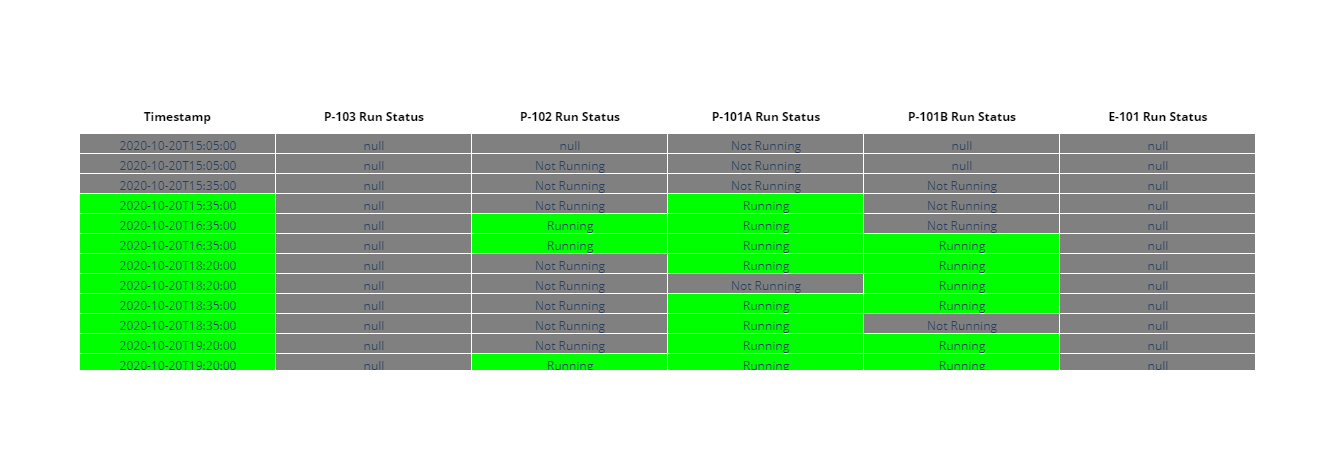

In [21]:
change_states = []
for c in run_status_columns:
    df = df_acad[["Timestamp"] + [c]]
    dft = df[df[c].shift(-1) != df[c]]
    # print(dft)
    change_states.append(dft)

change_state_df = (
    pd.concat(change_states).sort_values(["Timestamp"]).fillna(method="ffill")
)

change_state_df["timestamp_color"] = change_state_df.isin(["Running"]).any(axis=1).apply(lambda t: "rgb(0, 255, 0)" if t else "grey")
# change_state_df

fig = plot_table(change_state_df)
fig.show()

### Identify active periods from Run Statuses dataframe

The first period where a component is in `Running` mode starts with `P-101A` at 2020-10-20 15:20:00. The bulk of activity stops later at 2020-10-21 01:55:00. 

We'll use this information shortly below. 

### Extract the list of all columns of Float data type 

This is to plot all data on a single plot, which should be of the same data type. 

In [22]:
# reset max # of preview rows 
pd.set_option('display.max_rows', 10)

dv_def = hub.dataview_definition(namespace_id, dataview_id)
float_columns = list(dv_def[dv_def["Stream_Type"] == "Float"]["Column_Name"])
float_columns

['E-101 Air Cooler Outlet Pressure',
 'E-101 Air Cooler Outlet Temperature',
 'E-101 Inlet Pressure',
 'E-101 Shell Side Outlet Temperature',
 'E-102 Duty',
 'E-102 Heat Transfer Coefficient',
 'E-102 Inlet pressure',
 'E-102 LMTD',
 'E-102 Shell Side Inlet Temperature',
 'E-102 Tube Side Inlet Temperature',
 'E-102 Tube Side Outlet Pressure',
 'E-102 Tube Side Outlet Temperature Controller Output',
 'E-102 Tube Side Outlet Temperature Controller PV',
 'E-102 Tube Side Outlet Temperature Controller Setpoint',
 'Feed Flow Controller Output',
 'Feed Flow Controller PV',
 'Feed Flow Controller Setpoint',
 'Feed Tank Level Controller Output',
 'Feed Tank Level Controller PV',
 'Feed Tank Level Controller Setpoint',
 'H-101 Outlet Pressure',
 'H-101 Outlet Temperature Controller Output',
 'H-101 Outlet Temperature Controller PV',
 'H-101 Outlet Temperature Controller Setpoint',
 'P-101 A/B Discharge pressure',
 'P-102 Discharge pressure',
 'Product Water Flow']

### Request a data view from active period and then plot


  ==> Finished 'dataview_interpolated_pd' in       0.4249 secs [ 301 rows/sec ]


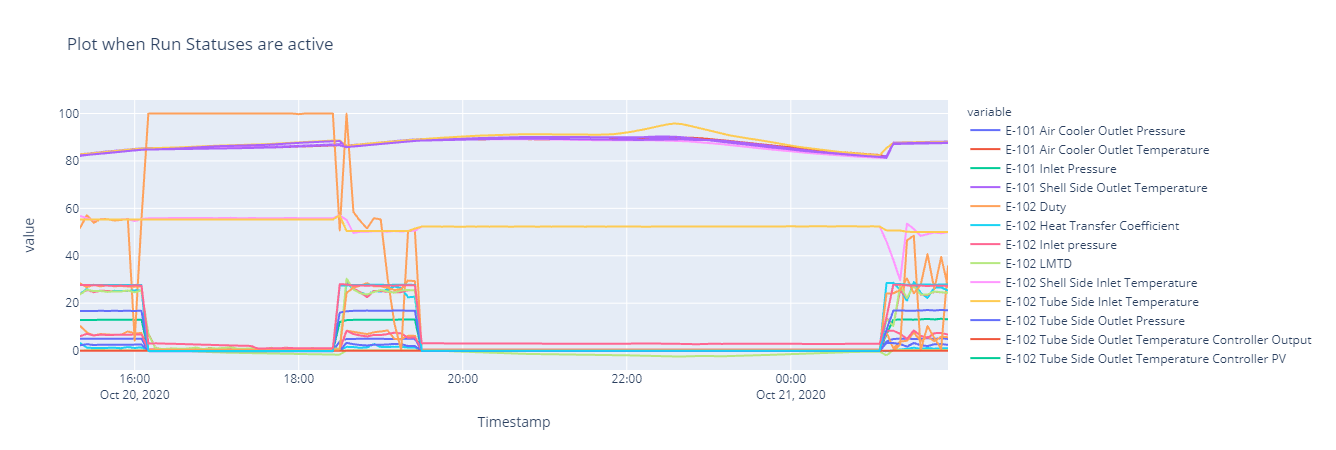

In [23]:
import plotly.express as px

df_active = hub.dataview_interpolated_pd(
    namespace_id, dataview_id, "2020-10-20T15:20:00", "2020-10-21T01:55:00", "00:05:00" 
)
fig = px.line(
    df_active, x="Timestamp", y=float_columns, title="Plot when Run Statuses are active"
)
fig

### Request a data view from inactive period and then plot

We shift the time period one day earlier before the active period. As you'll see, there is no much to see/analyze. 


  ==> Finished 'dataview_interpolated_pd' in       0.2783 secs [ 460 rows/sec ]


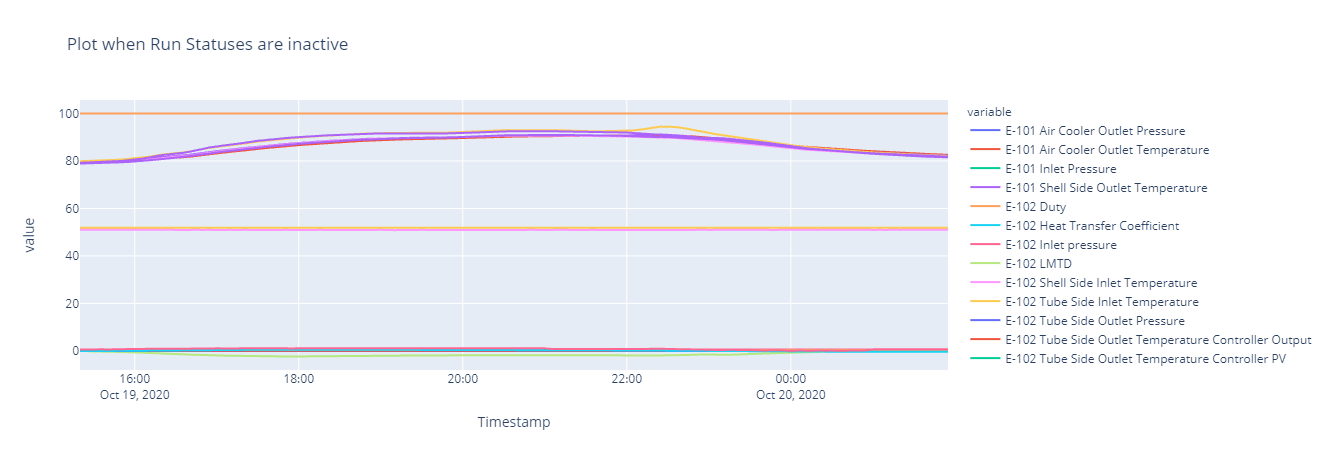

In [24]:
df_inactive = hub.dataview_interpolated_pd(
    namespace_id, dataview_id, "2020-10-19T15:20:00", "2020-10-20T01:55:00", "00:05:00"
)

fig = px.line(
    df_inactive,
    x="Timestamp",
    y=float_columns,
    title="Plot when Run Statuses are inactive",
)
fig

## Asset metadata

In some datasets like `Pilot_Plant`, assets have metadata (static information) attached to them. This metadata comes in the form of a Python dictionary, i.e. a set of keys, each key with an associated value. The example below is representative of equipment metadata available with `Pilot_Plant`. 

In [25]:
hub.asset_metadata(hot1_id)

{'E-102.Heat Exchange Area': 23.0, 'Asset_Id': 'HOT-1'}

## Metadata for all assets

It sometimes useful to get metadata of all assets into a single Pandas dataframe to select assets according to some criteria, for example Primary Usage.  

In [26]:
hub.all_assets_metadata()

E-102.Heat Exchange Area Asset_Id
0                      23.0    HOT-1
1                       NaN    HOT-3